In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('seaborn')
import seaborn as sns
sns.set_context('notebook')
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
covid_data = pd.read_csv(url)
covid_data.shape

(266, 122)

In [4]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,856,868,872,876,880,898,916,933,946,948
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,754,755,755,758,760,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,45,45,45,45,48,48,48,48,50


In [5]:
covid_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.148043,22.538640,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.512785e+04,1.541992e+04,1.570489e+04,1.602161e+04,1.634217e+04,1.669986e+04,1.707649e+04,1.742131e+04,1.772038e+04,1.805242e+04
std,24.909990,70.466256,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,8.652542e+04,8.785657e+04,8.915518e+04,9.061438e+04,9.206191e+04,9.388872e+04,9.563250e+04,9.732850e+04,9.864373e+04,1.001546e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.077500e+02,1.077500e+02,1.107500e+02,1.137500e+02,1.137500e+02,1.152500e+02,1.167500e+02,1.220000e+02,1.222500e+02,1.242500e+02
50%,23.488100,20.972650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.190000e+02,6.200000e+02,6.330000e+02,6.400000e+02,6.450000e+02,6.535000e+02,6.535000e+02,6.590000e+02,6.600000e+02,6.835000e+02
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.040750e+03,3.042000e+03,3.043500e+03,3.048500e+03,3.126750e+03,3.314750e+03,3.361000e+03,3.419750e+03,3.482750e+03,3.549250e+03
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,1.309550e+06,1.329260e+06,1.347881e+06,1.369376e+06,1.390406e+06,1.417774e+06,1.442824e+06,1.467820e+06,1.486757e+06,1.508308e+06


In [6]:
covid_data.rename(columns={'Province/State': 'state', 'Country/Region': 'country', 
                            'Lat': 'lat', 'Long': 'long'}, inplace=True)
covid_data.head()

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,856,868,872,876,880,898,916,933,946,948
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,754,755,755,758,760,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,45,45,45,45,48,48,48,48,50


# Select Countries

In [7]:
countries = covid_data.loc[(covid_data['country'] == 'US') | 
                     (covid_data['country'] == 'Korea, South') | 
                     (covid_data['country'] == 'Italy')]
countries

,state,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,218268,219070,219814,221216,222104,223096,223885,224760,225435,225886
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,10874,10909,10936,10962,10991,11018,11037,11050,11065,11078
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757,1508308


In [8]:
countries.drop(['state', 'country', 'lat', 'long'], axis=1, inplace=True)
countries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
137,0,0,0,0,0,0,0,0,0,2,...,218268,219070,219814,221216,222104,223096,223885,224760,225435,225886
143,1,1,2,2,3,4,4,4,4,11,...,10874,10909,10936,10962,10991,11018,11037,11050,11065,11078
225,1,1,2,2,5,5,5,5,5,7,...,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757,1508308


In [9]:
countries = countries.transpose()
countries.rename(columns={137: 'italy', 143: 'south_korea', 225: 'usa'}, inplace=True)
countries.head()

,italy,south_korea,usa
1/22/20,0,1,1
1/23/20,0,1,1
1/24/20,0,2,2
1/25/20,0,2,2
1/26/20,0,3,5


In [10]:
usa = countries['usa']
usa

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
5/14/20    1417774
5/15/20    1442824
5/16/20    1467820
5/17/20    1486757
5/18/20    1508308
Name: usa, Length: 118, dtype: int64

In [11]:
sk = countries['south_korea']
sk

1/22/20        1
1/23/20        1
1/24/20        2
1/25/20        2
1/26/20        3
           ...  
5/14/20    11018
5/15/20    11037
5/16/20    11050
5/17/20    11065
5/18/20    11078
Name: south_korea, Length: 118, dtype: int64

In [12]:
italy = countries['italy']
italy

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
5/14/20    223096
5/15/20    223885
5/16/20    224760
5/17/20    225435
5/18/20    225886
Name: italy, Length: 118, dtype: int64

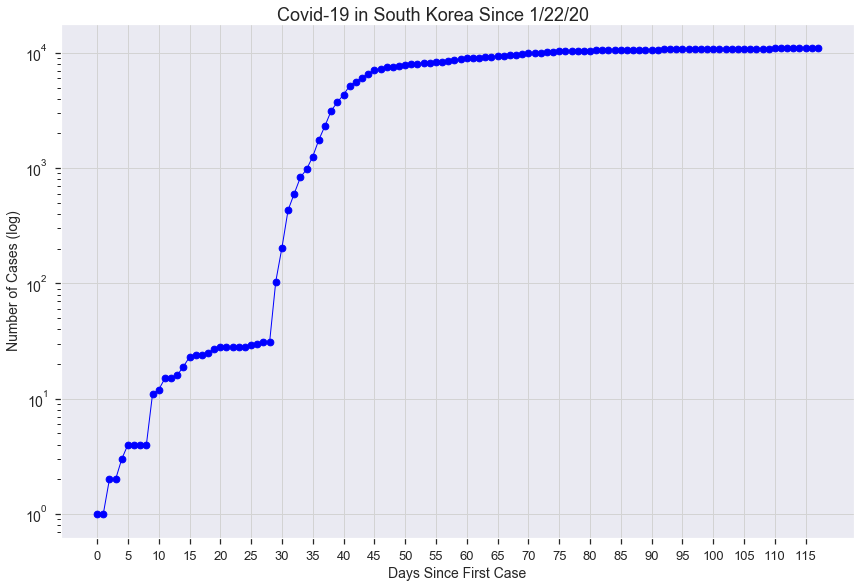

In [13]:
x = np.arange(len(sk))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, sk, color='blue', s=45)
ax.plot(x, sk, color='blue', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 5))
ax.set_yticks(np.arange(0, max(sk), 1000))
ax.set_yscale(value='log')
plt.tight_layout()
fig.suptitle('Covid-19 in South Korea Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

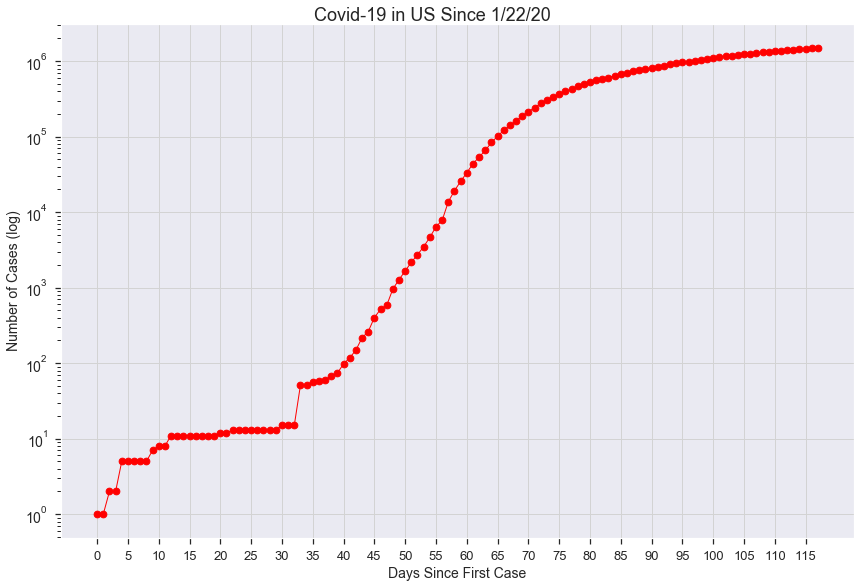

In [14]:
x = np.arange(len(usa))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, usa, color='red', s=45)
ax.plot(x, usa, color='red', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 5))
ax.set_yticks(np.arange(0, max(usa), 10000))
ax.set_yscale(value='log')
fig.suptitle('Covid-19 in US Since 1/22/20', fontsize=18, va='bottom')
plt.tight_layout()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

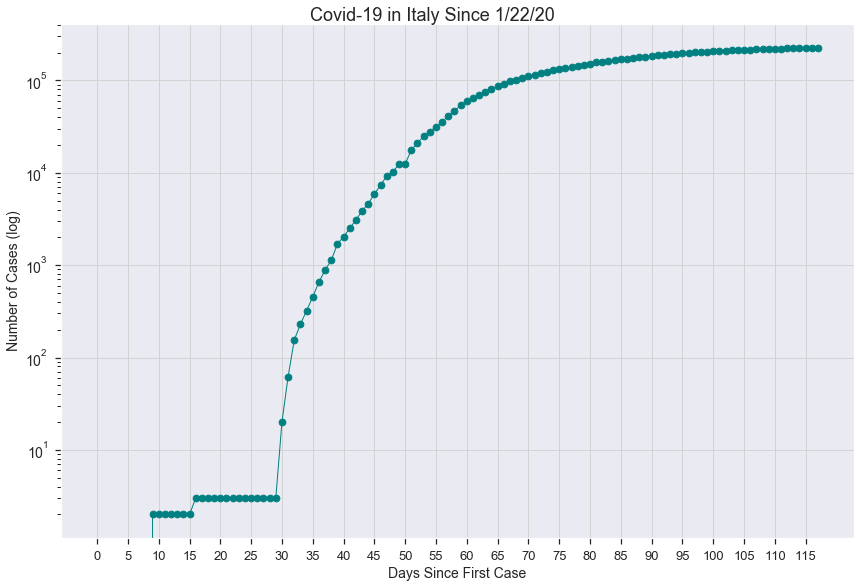

In [15]:
x = np.arange(len(italy))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, italy, color='teal', s=45)
ax.plot(x, italy, color='teal', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 5))
ax.set_yticks(np.arange(min(italy), max(italy), 10000))
ax.set_yscale(value='log')
plt.tight_layout()
fig.suptitle('Covid-19 in Italy Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

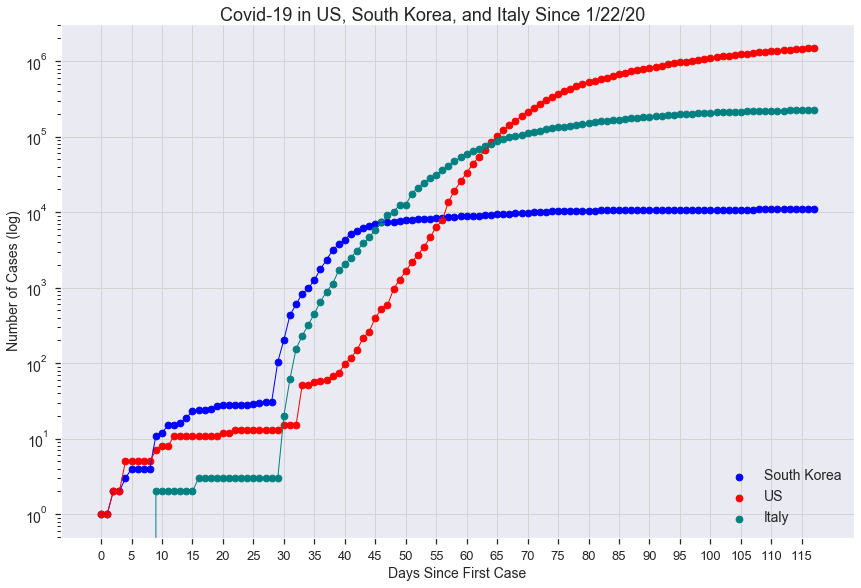

In [16]:
x = np.arange(len(sk))
places = ['US', 'South Korea', 'Italy']
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x, sk, color='blue', s=45, label='South Korea')
ax.plot(x, sk, color='blue', linewidth=1)
ax.scatter(x, usa, color='red', s=45, label='US')
ax.plot(x, usa, color='red', linewidth=1)
ax.scatter(x, italy, color='teal', s=45, label='Italy')
ax.plot(x, italy, color='teal', linewidth=1)
ax.grid(c='lightgrey')
ax.set_xlabel('Days Since First Case', fontsize=14)
ax.set_ylabel('Number of Cases (log)', fontsize=14)
ax.set_xticks(np.arange(min(x), max(x)+1, 5))
ax.set_yticks(np.arange(0, max(sk), 1000))
ax.set_yscale(value='log')
plt.tight_layout()
ax.legend(loc='lower right', prop={'size': 14})
fig.suptitle('Covid-19 in US, South Korea, and Italy Since 1/22/20', fontsize=18, va='bottom')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

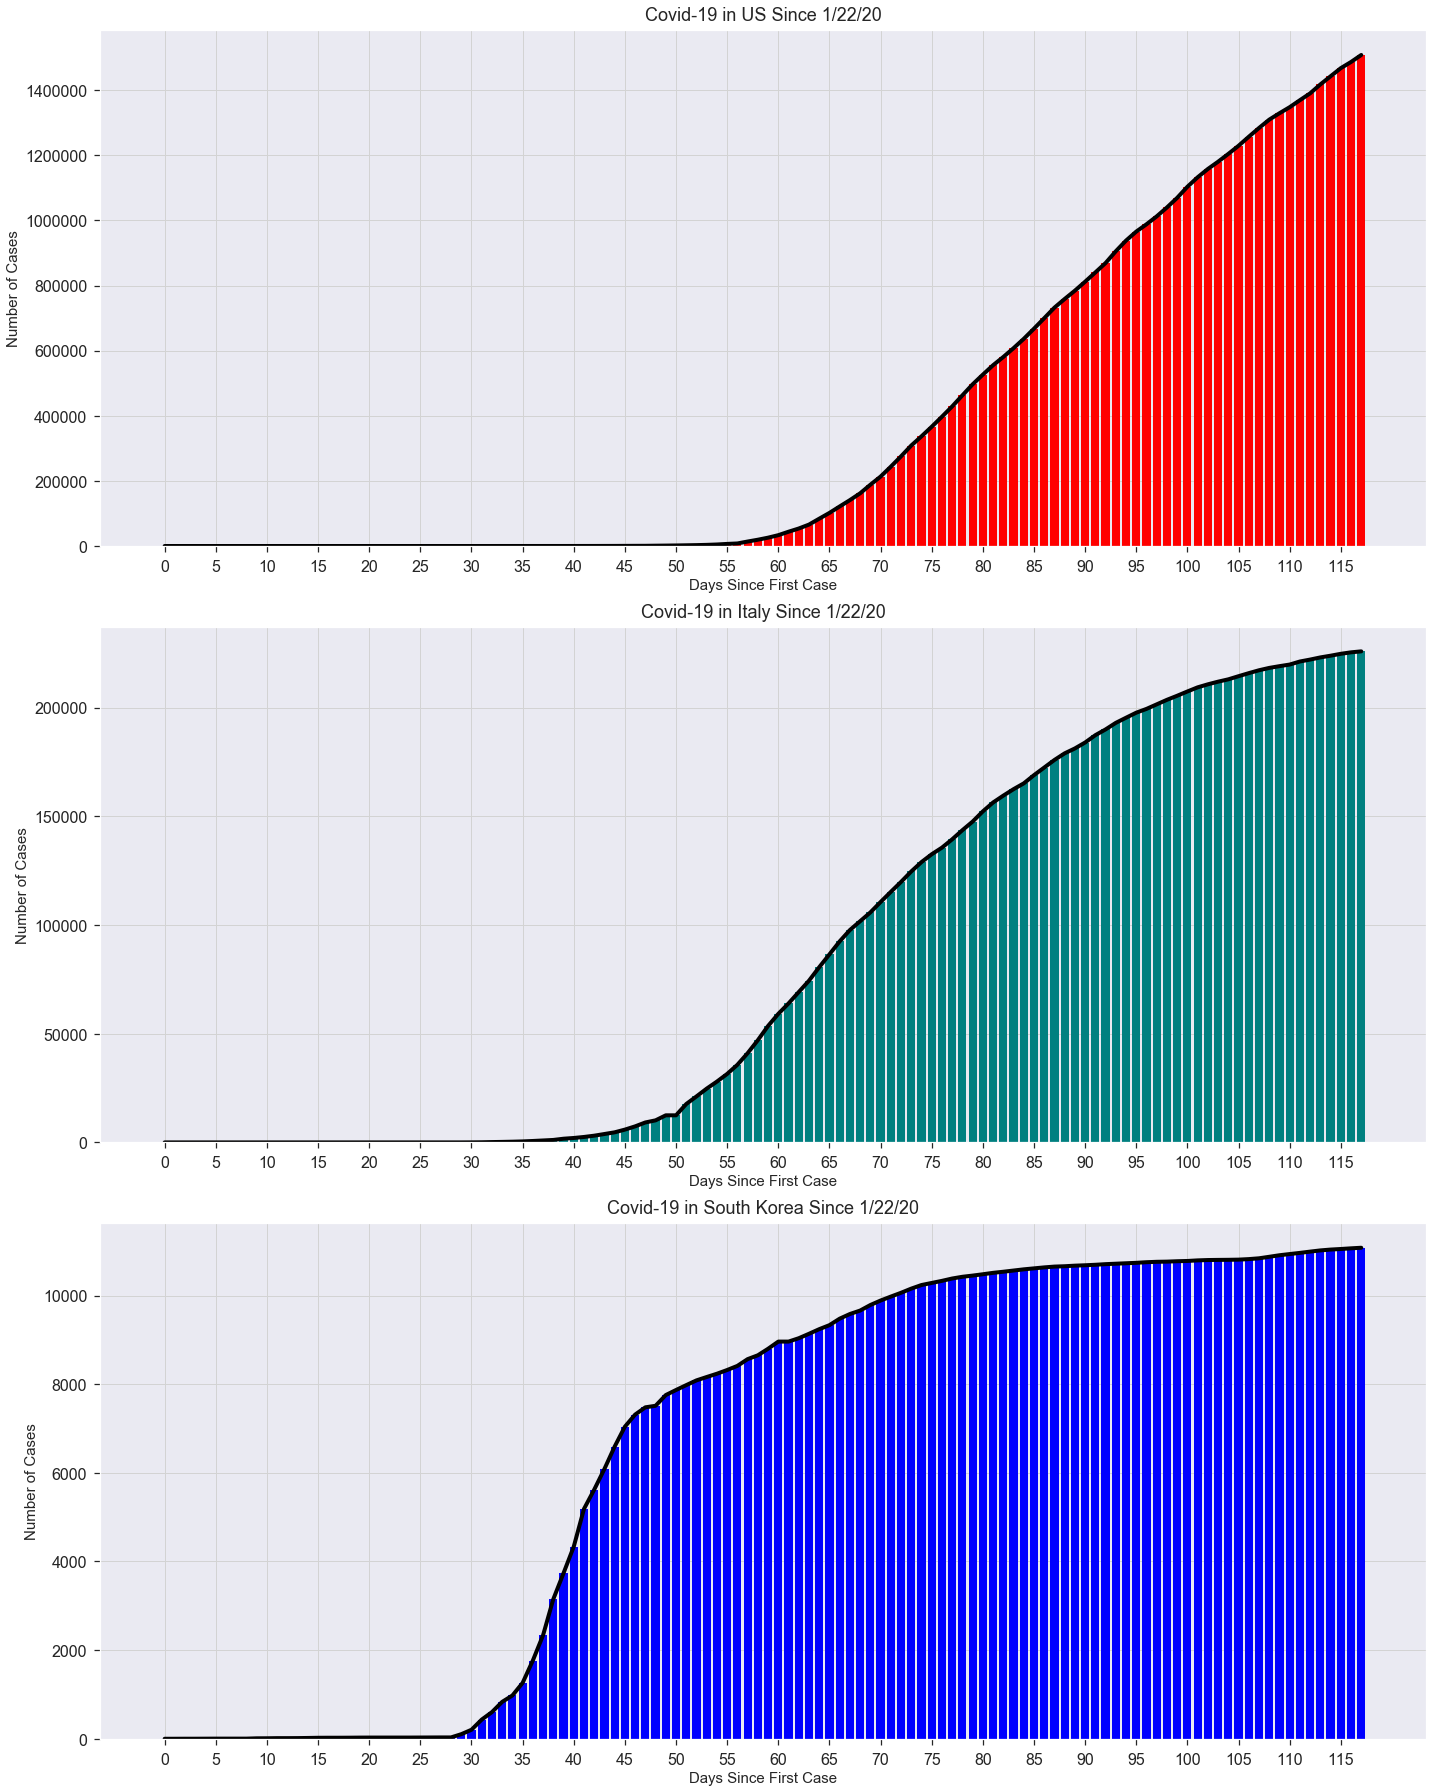

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,25))
axes = [ax1, ax2, ax3]
ax1.plot(x, usa, color='black', linewidth=4)
ax2.plot(x, italy, color='black', linewidth=4)
ax3.plot(x, sk, color='black', linewidth=4)
ax1.bar(x, usa, color='red')
ax2.bar(x, italy, color='teal')
ax3.bar(x, sk, color='blue')
for ax in axes:
    ax.set_xlabel('Days Since First Case', fontsize=15)
    ax.set_ylabel('Number of Cases', fontsize=15)
    ax.set_xticks(np.arange(min(x), max(x)+1, 5))
    ax.grid(c='lightgrey')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
ax1.set_title('Covid-19 in US Since 1/22/20', fontsize=18, va='bottom')
ax2.set_title('Covid-19 in Italy Since 1/22/20', fontsize=18, va='bottom')
ax3.set_title('Covid-19 in South Korea Since 1/22/20', fontsize=18, va='bottom')
plt.tight_layout()
plt.show()

### Simple regression to compare growth rates in 2 different time periods in the US

In [18]:
us_48 = np.log(usa[48:70]) # days 48 onward in the US
us_70 = np.log(usa[70:])
print(us_48[0:5])
print(us_70[0:5])

3/10/20    6.865891
3/11/20    7.155396
3/12/20    7.416378
3/13/20    7.686621
3/14/20    7.910957
Name: usa, dtype: float64
4/1/20    12.270183
4/2/20    12.403373
4/3/20    12.525860
4/4/20    12.639963
4/5/20    12.727250
Name: usa, dtype: float64


In [19]:
def linear_regression(y):
    x = np.arange(len(y)).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    print('R Squared:', r2_score(y, y_pred))
    print('MSE:', mean_squared_error(y, y_pred))
    print('Intercept:', np.squeeze(model.intercept_))
    print('Coefficient:', np.squeeze(model.coef_))

In [20]:
linear_regression(us_48)

R Squared: 0.9883360247566859
MSE: 0.033583054060935744
Intercept: 6.961042790659135
Coefficient: 0.26589255066550815


In [21]:
linear_regression(us_70)

R Squared: 0.9218939343786187
MSE: 0.02180536933532545
Intercept: 12.728361610620933
Coefficient: 0.03662043302267974
